# **Hotel Booking Analysis**

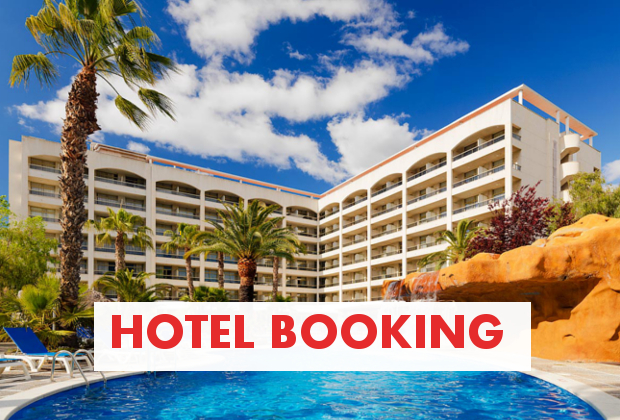
### **Problem Statement:**


---


**In,** Recent years, City Hotel & Resort Hotel Have Been High Cancellation rates. Each hotel is dealing with number of issues as a results, including fewer revenues & less than ideal hotel room use. Consequently, lowering cancellation reates is both hotel.

The analysis of hotel booking cancellation as well as other factors that have no bearing on their business & yearly revenue generation are main topics of this project.
     

### **Primary Goal 🎯 :**


---


 In order to increase their efficiency in generating revenue & for us to offer thorough business advice to address their problem.

In [3]:
#importing Required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/hotel_bookings.csv')

# **Exploratory Data Analysis & Cleaning**

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [6]:
df.shape

(119390, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [9]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [10]:
for col in df.describe(include = 'object').columns:
  print(col)
  print(df[col].unique())
  print('-'*60)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
df.drop(['company','agent'], axis = 1, inplace = True)
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

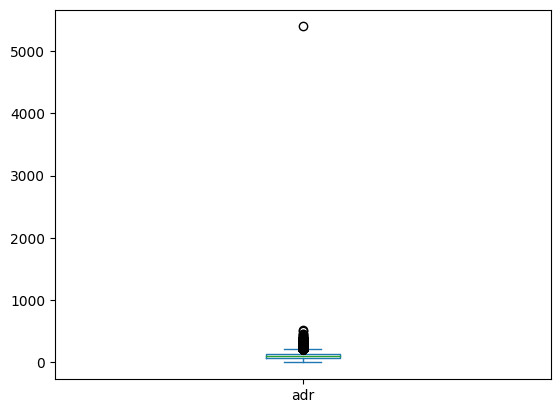

In [15]:
df['adr'].plot(kind = 'box') # there is outlier in column "adr" which is to be clearly see in box plot

In [16]:
df = df[df['adr'] < 5000] #removing outlier
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


# **Data Analysis & Visualization**

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


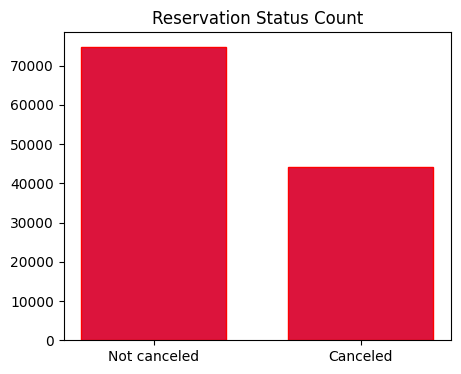

In [17]:
cancel_percentage = df['is_canceled'].value_counts(normalize = True) #normalize parameter returns the count percentage
print(cancel_percentage)

plt.figure(figsize= (5,4))
plt.title('Reservation Status Count')
plt.bar(['Not canceled','Canceled'], df['is_canceled'].value_counts(), edgecolor = 'r', color = 'crimson', width = 0.7)
plt.show()


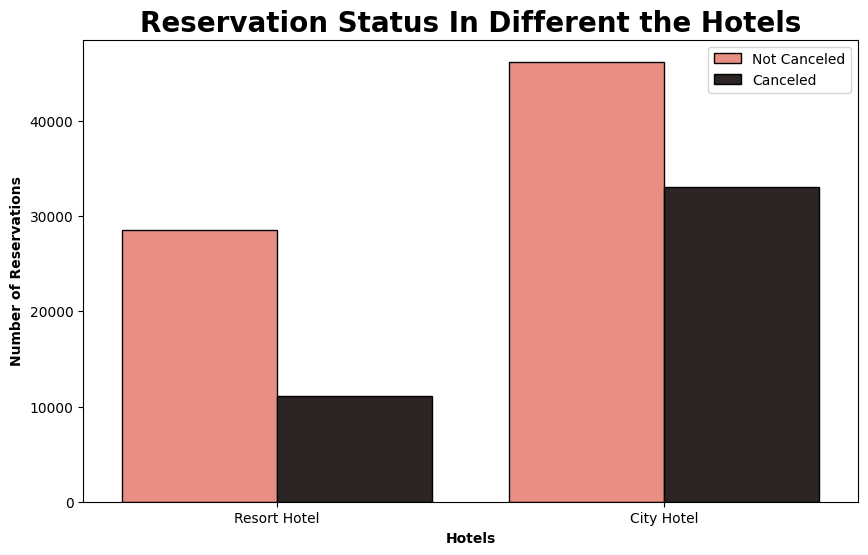

In [18]:
# Creating plot for hotel on the basis of reservation status count
plt.figure(figsize = (10,6))
ax1 = sns.countplot(x = 'hotel', hue ='is_canceled', data = df, palette = "dark:salmon_r", edgecolor = 'k')
legend_labels = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=[1,1])
plt.title('Reservation Status In Different the Hotels', size = 20, fontweight = 'bold')
plt.xlabel('Hotels',fontweight = 'bold')
plt.ylabel('Number of Reservations',fontweight = 'bold')
plt.legend(['Not Canceled','Canceled'])
plt.show()

In [19]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [20]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [21]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

In [22]:
resort_hotel = resort_hotel[:864]

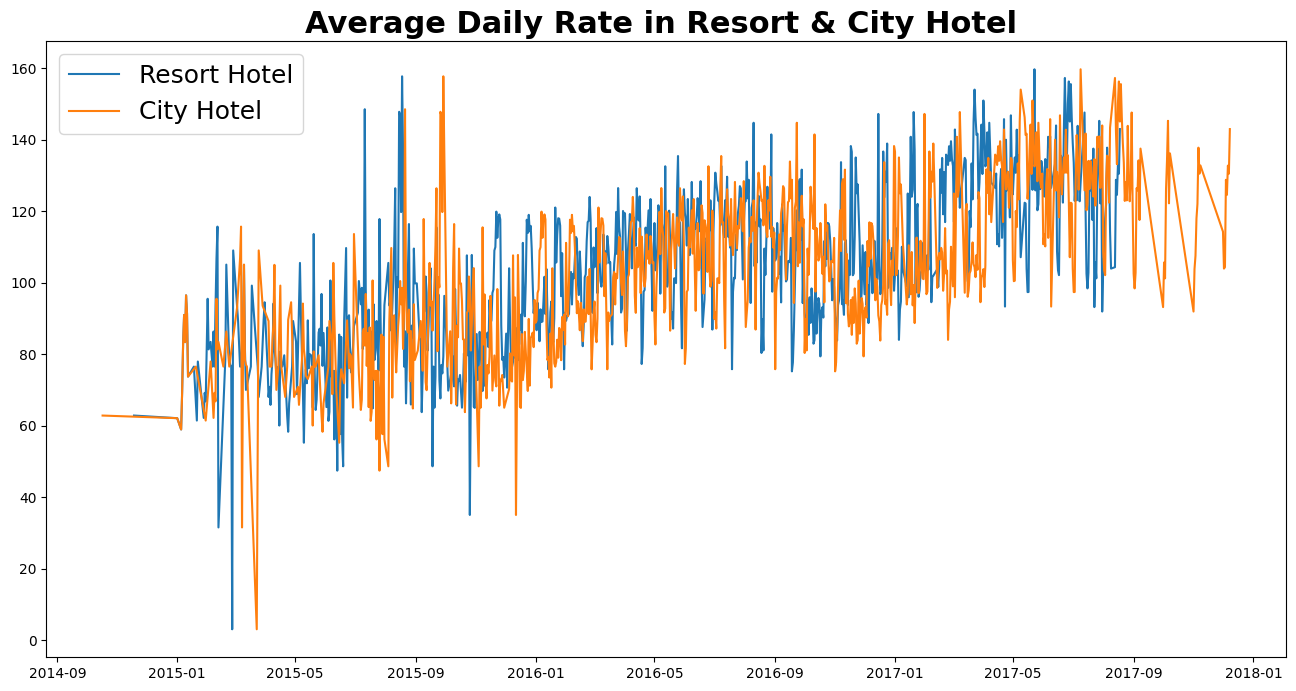

In [23]:
plt.figure(figsize = (16, 8))
plt.title('Average Daily Rate in Resort & City Hotel ', fontsize = 22, fontweight = 'bold')
plt.plot(resort_hotel.index,city_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 18)
plt.show()

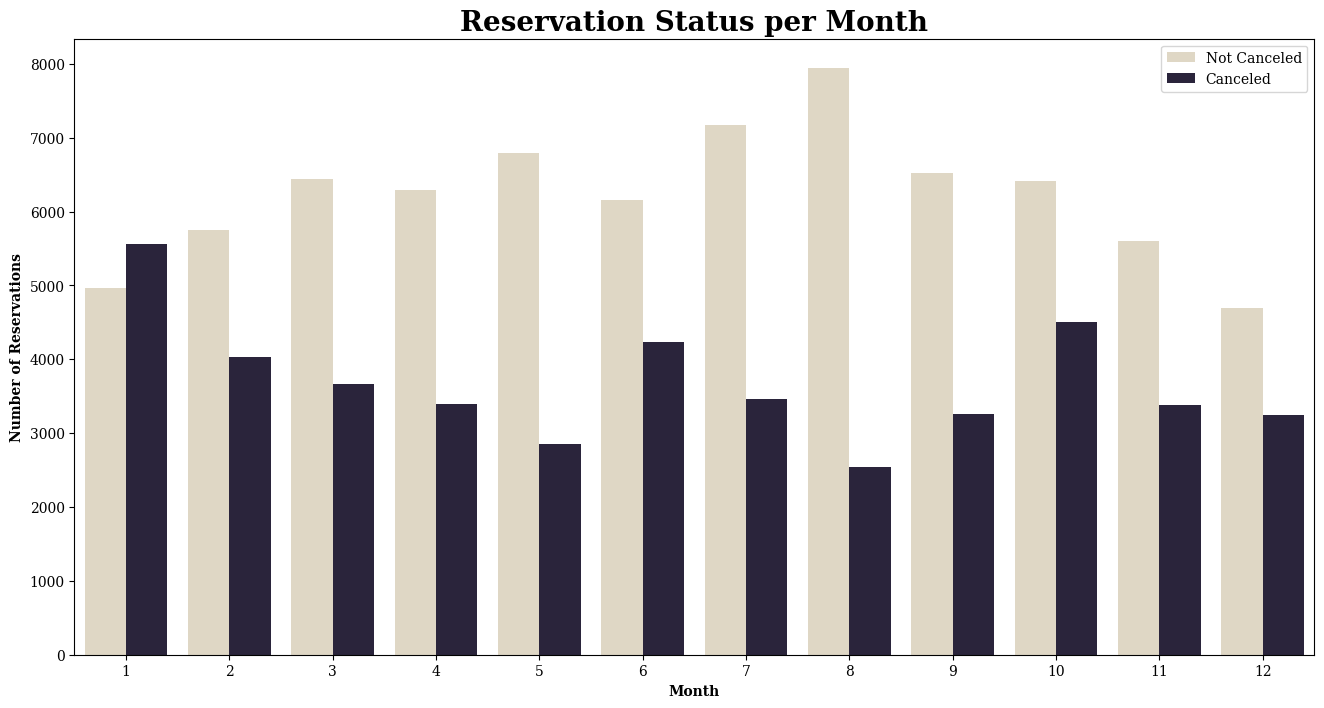

In [24]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
plt.rcParams["font.family"] = "serif"
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'ch:s=-.2,r=.6')
legend_labels = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=[1,1])
plt.title('Reservation Status per Month', size = 20, fontweight = 'bold')
plt.xlabel('Month',fontweight = 'bold')
plt.ylabel('Number of Reservations',fontweight = 'bold')
plt.legend(['Not Canceled','Canceled'])
plt.show()

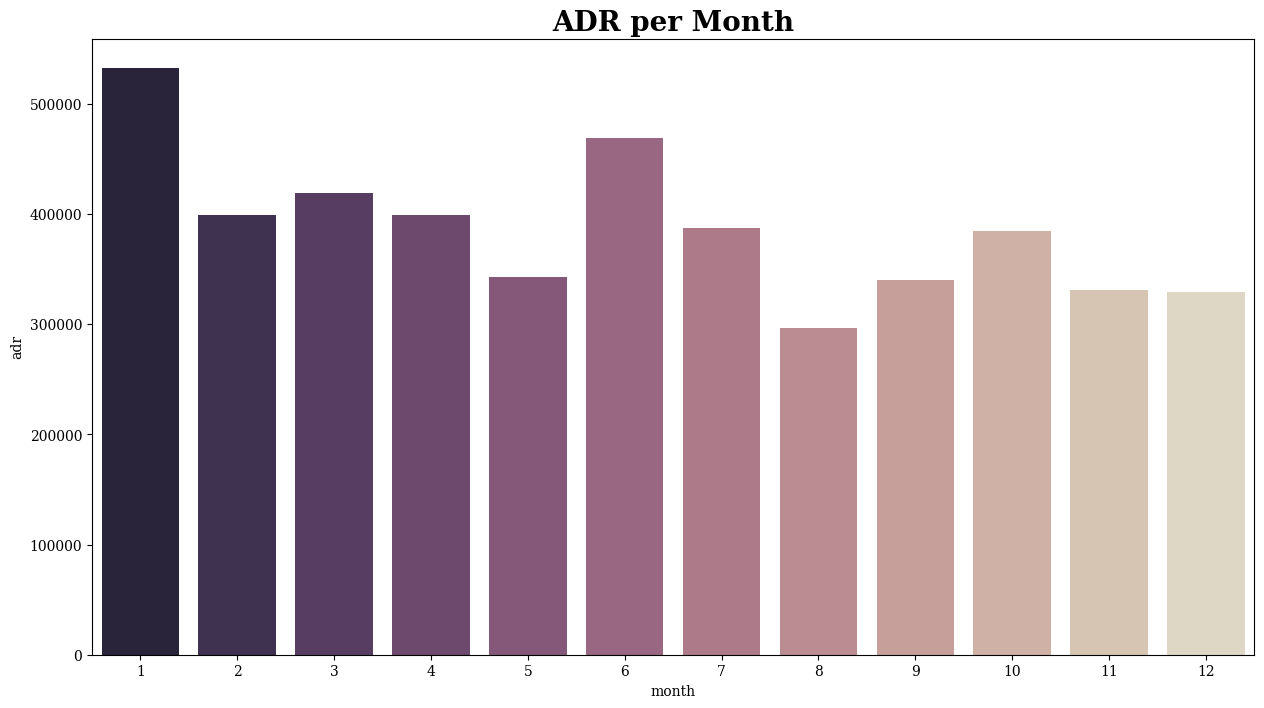

In [25]:
# Lets plot the graph for ADR ( Price) per month
plt.figure(figsize = (15, 8))
plt.rcParams["font.family"] = "serif"
temp = df[df['is_canceled'] == 1].groupby('month')['adr'].sum().reset_index()
sns.barplot(x = 'month',y = 'adr',data = temp, palette = 'ch:s=-.2,r=.6_r')
plt.title('ADR per Month', size = 20, fontweight = 'bold')
plt.show()

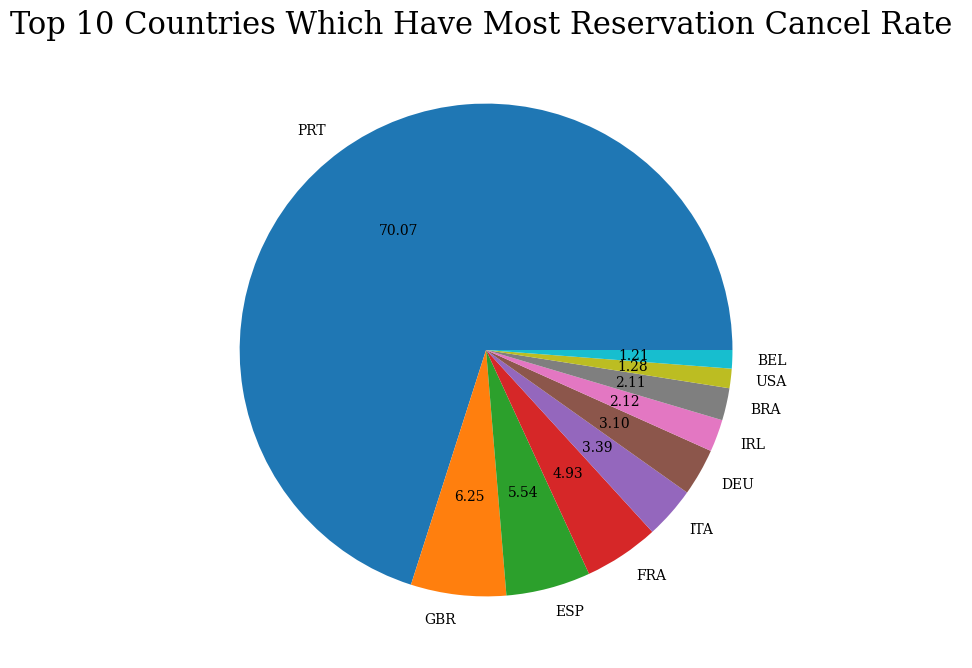

In [26]:
#Cancellation Rate Based on top 10 Countries
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10] # return decending order,how many times particular country is repeating in column
plt.figure(figsize = (8, 8))
plt.title('Top 10 Countries Which Have Most Reservation Cancel Rate ', fontsize = 22)
plt.pie(top_10_country,autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [27]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [28]:
# Finding percentage of Booking as per market segment
df['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [29]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

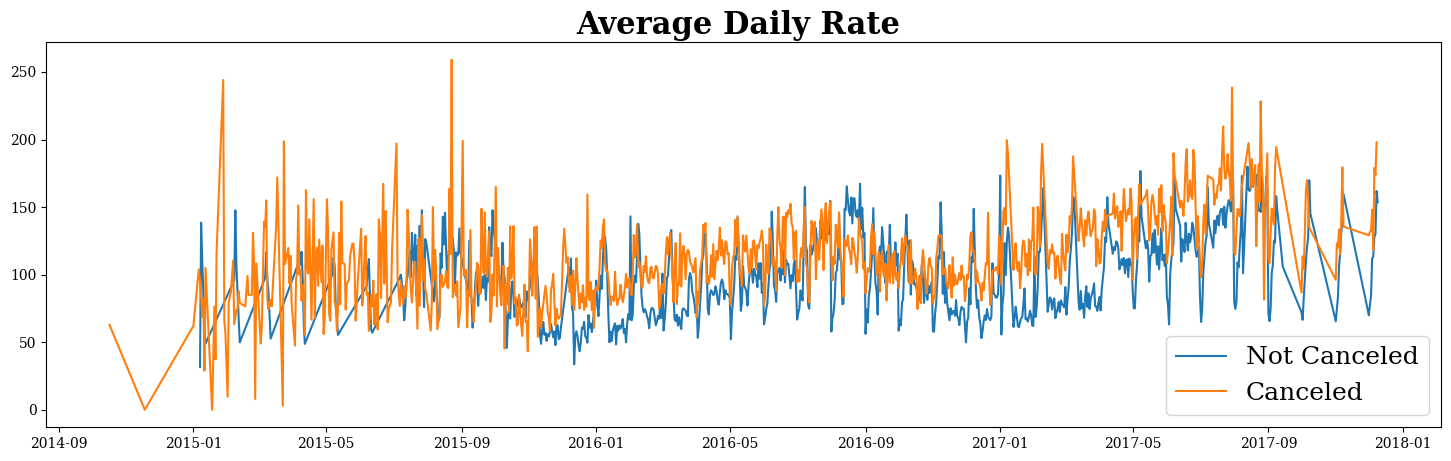

In [36]:
# Find Price at time of Cancellation & Not Canceled
cancel_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancel_df_adr.reset_index(inplace = True)
cancel_df_adr.sort_values('reservation_status_date',inplace = True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancel_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancel_df_adr.reset_index(inplace = True)
not_cancel_df_adr.sort_values('reservation_status_date',inplace = True)
#Visualize
plt.figure(figsize = (18, 5))
plt.title('Average Daily Rate ', fontsize = 22, fontweight = 'bold')
plt.plot(not_cancel_df_adr['reservation_status_date'], not_cancel_df_adr['adr'], label = 'Not Canceled')
plt.plot(cancel_df_adr['reservation_status_date'], cancel_df_adr['adr'], label = 'Canceled')
plt.legend(fontsize = 18)
plt.show()

In [38]:
cancel_df_adr = cancel_df_adr[(cancel_df_adr['reservation_status_date'] >= '2016-01') & (cancel_df_adr['reservation_status_date'] < '2017-09')]
not_cancel_df_adr = not_cancel_df_adr[(not_cancel_df_adr['reservation_status_date'] >= '2016-01') & (not_cancel_df_adr['reservation_status_date'] < '2017-09')]

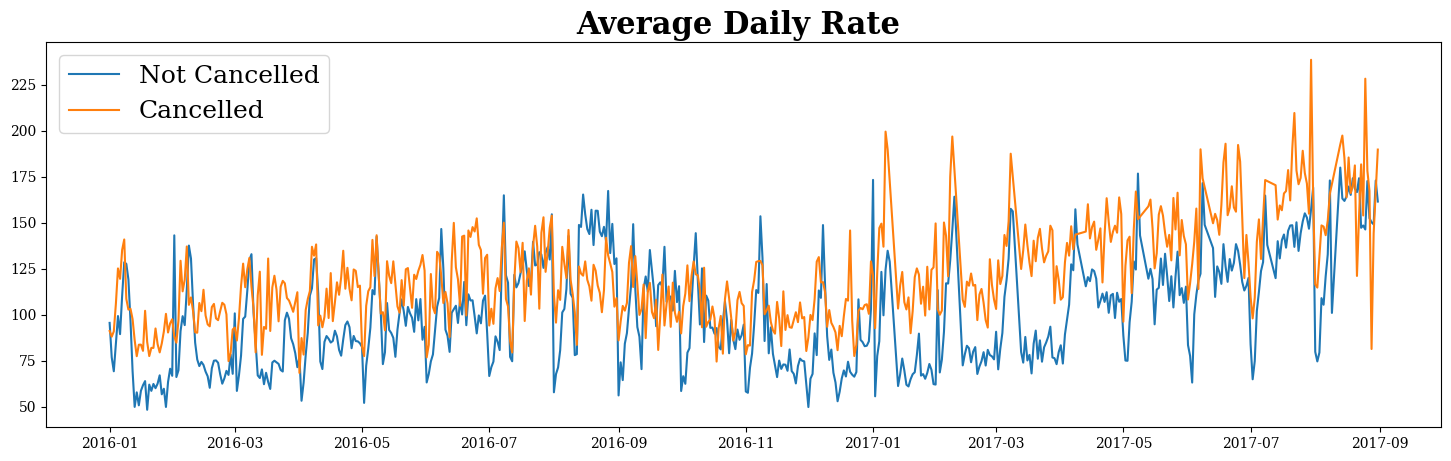

In [40]:
plt.figure(figsize = (18, 5))
plt.title('Average Daily Rate ', fontsize = 22, fontweight = 'bold')
plt.plot(not_cancel_df_adr['reservation_status_date'], not_cancel_df_adr['adr'], label = 'Not Cancelled')
plt.plot(cancel_df_adr['reservation_status_date'], cancel_df_adr['adr'], label = 'Cancelled')
plt.legend(fontsize = 18)
plt.show()